# Text Classification using Multinomial Naive Bayes Classifier
***

## Step 1: Import Necessary Libraries

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer




## Step 2: Load the Dataset

In [3]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# column rename
data.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True) 

# label encoding
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# drop unnecessary col's(column 2,3,4 drop)
data = data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

data.head() 

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data['text'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [6]:
data['label'].head()

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64

In [7]:
data.shape

(5572, 2)

## Step 3: Data Analysis

In [12]:
df = data
df.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
# Display basic information about the dataset
df.info()

# Display summary statistics for the dataset
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
label,5572.0,NaN,NaN,NaN,0.134063,0.340751,0.0,0.0,0.0,0.0,1.0
text,5572,5169,"Sorry, I'll call later",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


label    0
text     0
dtype: int64


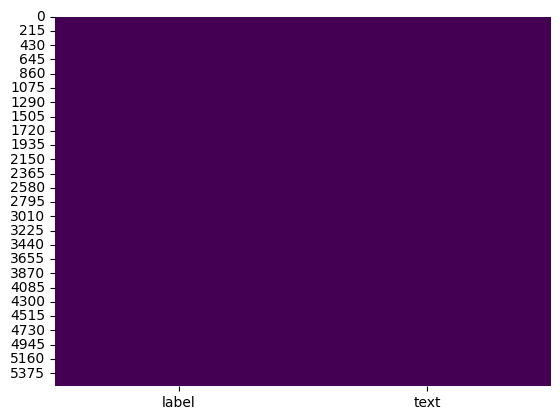

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


**Text Length Analysis**

    - Distribution of Text Lengths

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


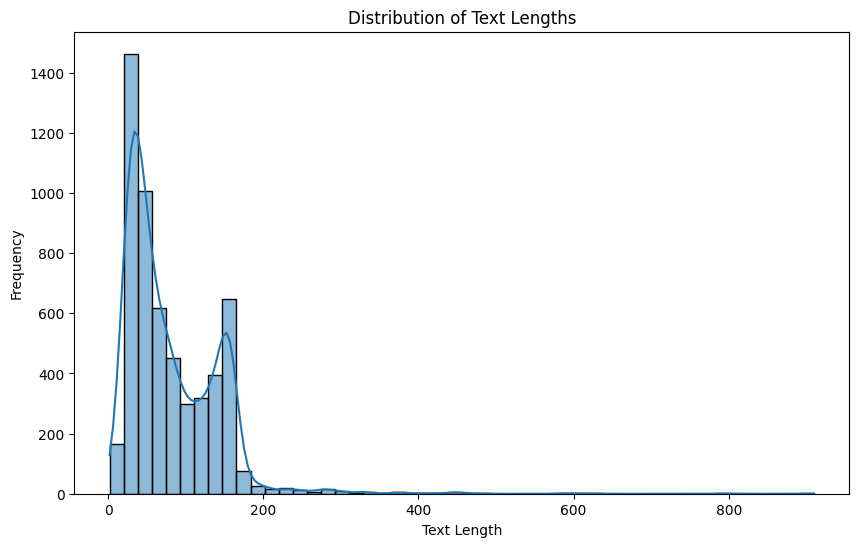

In [18]:
# Calculate the length of each text entry
df['text_length'] = df['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


    - Boxplot of text lengths by label

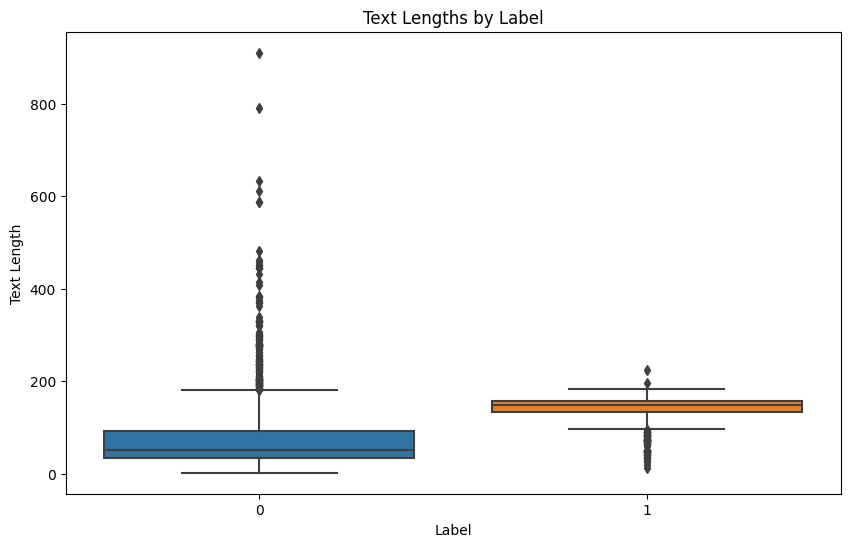

In [19]:
# Boxplot of text lengths by label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Lengths by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()


**Word Frequency Analysis**

    - Most Common Words (this code snippet is usually used after text preprocessing)

[('u', 1206), ('call', 603), ('im', 474), ('get', 401), ('ur', 384), ('go', 308), ('dont', 290), ('free', 278), ('ok', 277), ('ltgt', 276), ('know', 267), ('day', 255), ('come', 247), ('like', 245), ('ill', 241), ('got', 239), ('good', 235), ('time', 233), ('text', 215), ('want', 213)]


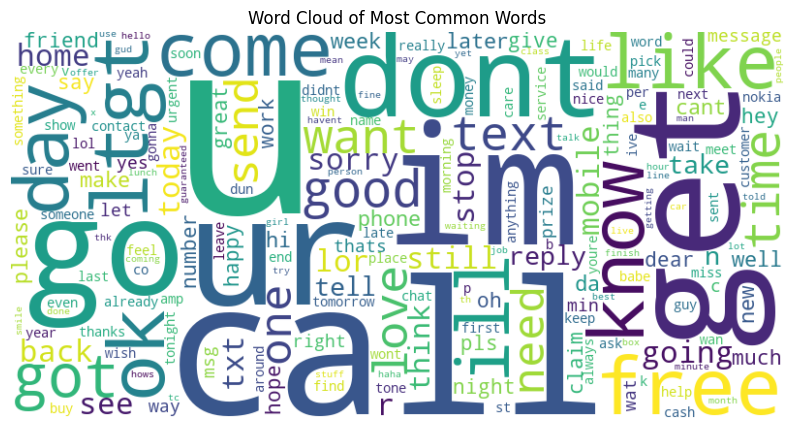

In [30]:
from collections import Counter
from wordcloud import WordCloud

# Combine all text data into one string
all_words = ' '.join(df['cleaned_text'])

# Tokenize the words
words = all_words.split()

# Calculate word frequencies
word_freq = Counter(words)

# Display the most common words
most_common_words = word_freq.most_common(20)
print(most_common_words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()


In [31]:
# Function to get word frequency for a specific label
def get_word_freq_by_label(label):
    text = ' '.join(df[df['label'] == label]['cleaned_text'])
    words = text.split()
    return Counter(words)

# Get word frequencies for each label
word_freq_label_0 = get_word_freq_by_label(0)
word_freq_label_1 = get_word_freq_by_label(1)

# Display the most common words for each label
print('Most common words for label 0:', word_freq_label_0.most_common(10))
print('Most common words for label 1:', word_freq_label_1.most_common(10))


Most common words for label 0: [('u', 1043), ('im', 461), ('get', 318), ('ltgt', 276), ('go', 275), ('ok', 272), ('dont', 268), ('come', 242), ('know', 241), ('call', 241)]
Most common words for label 1: [('call', 362), ('free', 219), ('u', 163), ('txt', 151), ('ur', 144), ('text', 138), ('mobile', 136), ('stop', 116), ('claim', 115), ('reply', 103)]


**Visualizing Word Frequencies**

    - Bar Plot of Most Common Words

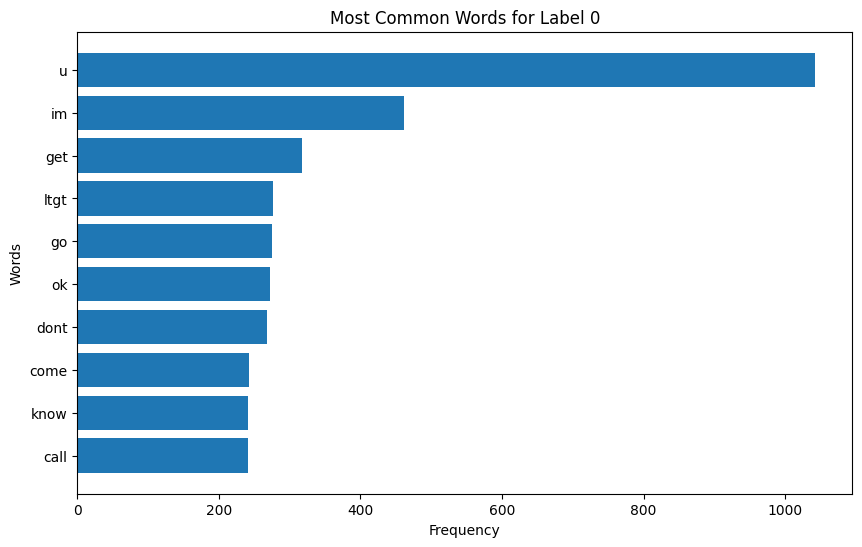

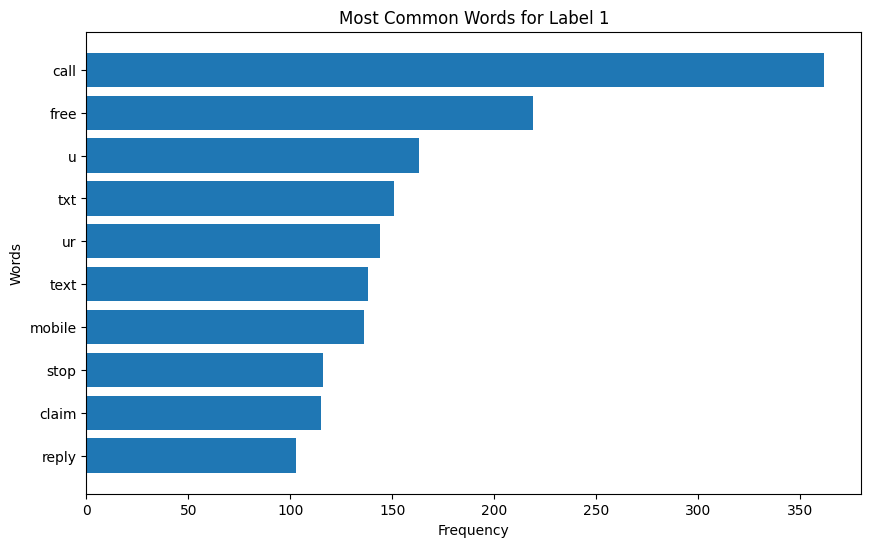

In [35]:
import matplotlib.pyplot as plt

# Plot the most common words for label 0
common_words_0 = word_freq_label_0.most_common(10)
words_0, counts_0 = zip(*common_words_0)

plt.figure(figsize=(10, 6))
plt.barh(words_0, counts_0)
plt.title('Most Common Words for Label 0')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent words at the top
plt.show()

# Plot the most common words for label 1
common_words_1 = word_freq_label_1.most_common(10)
words_1, counts_1 = zip(*common_words_1)

plt.figure(figsize=(10, 6))
plt.barh(words_1, counts_1)
plt.title('Most Common Words for Label 1')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent words at the top
plt.show()


**Bigram and Trigram Analysis**

    - Bigrams

In [36]:
from nltk import bigrams

# Get bigrams
bigrams_list = list(bigrams(words))

# Calculate bigram frequencies
bigram_freq = Counter(bigrams_list)

# Display the most common bigrams
most_common_bigrams = bigram_freq.most_common(10)
print(most_common_bigrams)


[(('please', 'call'), 55), (('call', 'later'), 52), (('ill', 'call'), 48), (('u', 'r'), 44), (('let', 'know'), 41), (('r', 'u'), 40), (('dont', 'know'), 39), (('sorry', 'ill'), 39), (('new', 'year'), 32), (('good', 'morning'), 31)]


    - Trigram

In [37]:
from nltk import trigrams

# Get trigrams
trigrams_list = list(trigrams(words))

# Calculate trigram frequencies
trigram_freq = Counter(trigrams_list)

# Display the most common trigrams
most_common_trigrams = trigram_freq.most_common(10)
print(most_common_trigrams)


[(('ill', 'call', 'later'), 42), (('sorry', 'ill', 'call'), 38), (('prize', 'guaranteed', 'call'), 21), (('happy', 'new', 'year'), 19), (('call', 'land', 'line'), 18), (('private', 'account', 'statement'), 16), (('call', 'customer', 'service'), 15), (('call', 'identifier', 'code'), 15), (('guaranteed', 'call', 'land'), 15), (('call', 'p', 'per'), 15)]


## Step 4: Preprocess the Text Data
Tokenization, Lowercasing, Removing Stopwords, Removing Punctuation, Stemming, Lemmatization, Joining Tokens Back

In [27]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the first few rows of the cleaned data
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,label,text,text_length,cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think go usf life around though


In [28]:
df.cleaned_text[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [29]:
df.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## Step 5: Split the Dataset

In [38]:
X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 6: Feature Extraction

In [40]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Step 7: Train the Model

In [42]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

## Step 8: Evaluate the Model

Accuracy: 0.9695
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



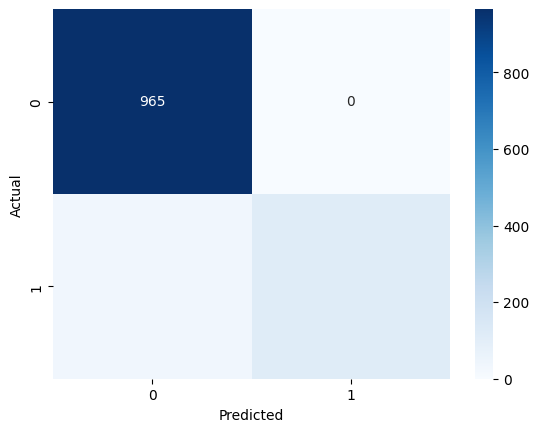

In [43]:
y_pred = model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Step 9: Make Predictions on New Data

In [44]:
new_text = ["This is a sample text to classify"]
new_text_cleaned = [preprocess_text(text) for text in new_text]
new_text_tfidf = tfidf_vectorizer.transform(new_text_cleaned)
prediction = model.predict(new_text_tfidf)
print(f'Prediction: {prediction[0]}')


Prediction: 0


***

 **Here is the complete code**

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
label    0
text     0
dtype: int64


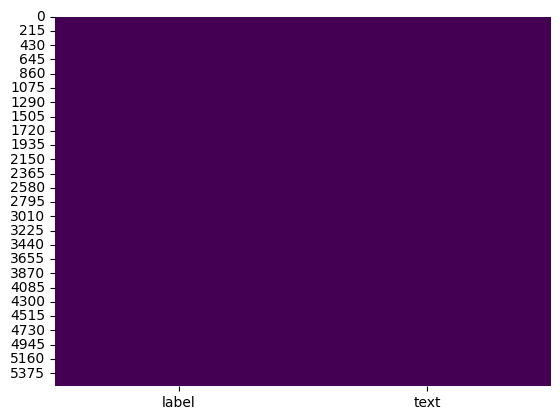

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


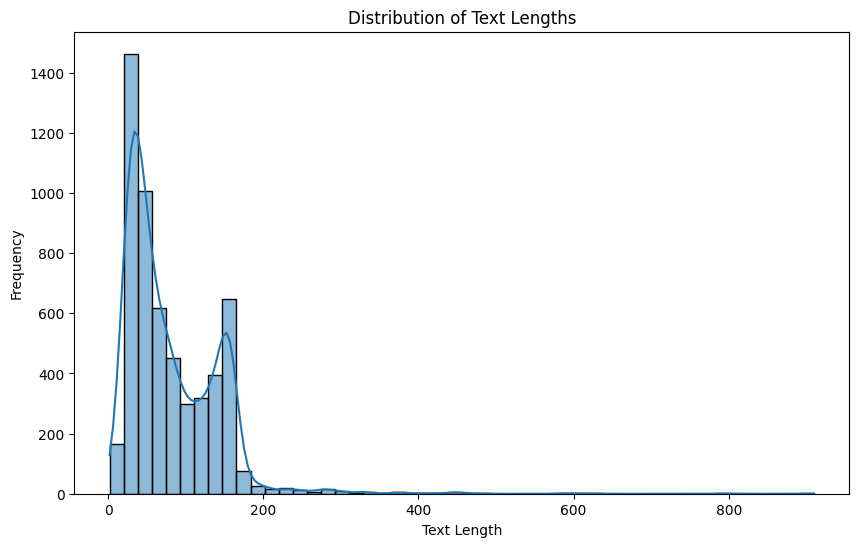

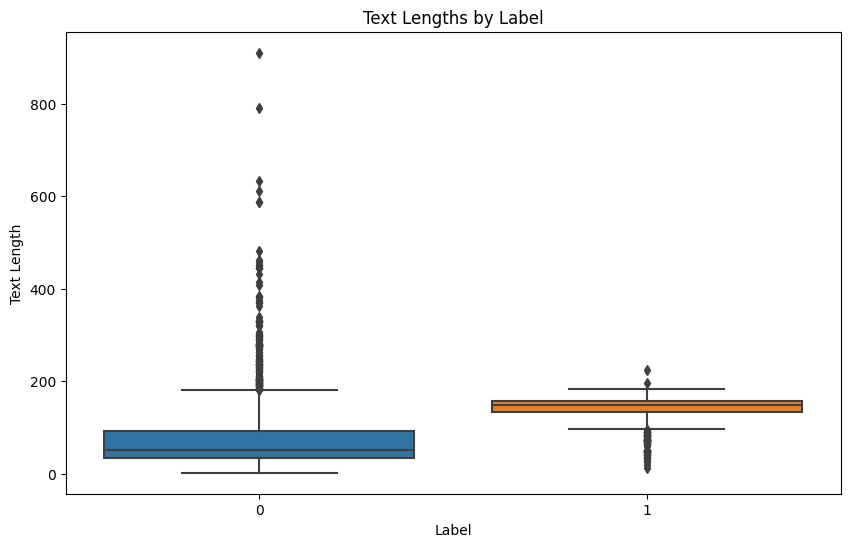

[('u', 1206), ('call', 603), ('im', 474), ('get', 401), ('ur', 384), ('go', 308), ('dont', 290), ('free', 278), ('ok', 277), ('ltgt', 276), ('know', 267), ('day', 255), ('come', 247), ('like', 245), ('ill', 241), ('got', 239), ('good', 235), ('time', 233), ('text', 215), ('want', 213)]


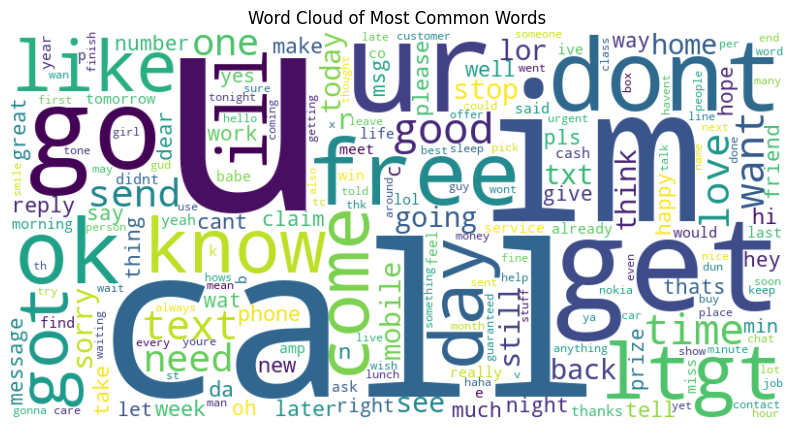

Most common words for label 0: [('u', 1043), ('im', 461), ('get', 318), ('ltgt', 276), ('go', 275), ('ok', 272), ('dont', 268), ('come', 242), ('know', 241), ('call', 241)]
Most common words for label 1: [('call', 362), ('free', 219), ('u', 163), ('txt', 151), ('ur', 144), ('text', 138), ('mobile', 136), ('stop', 116), ('claim', 115), ('reply', 103)]


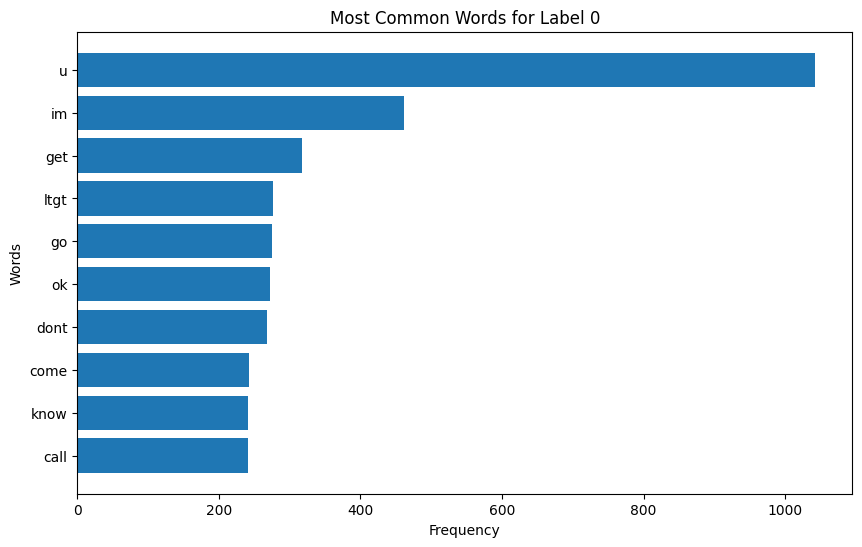

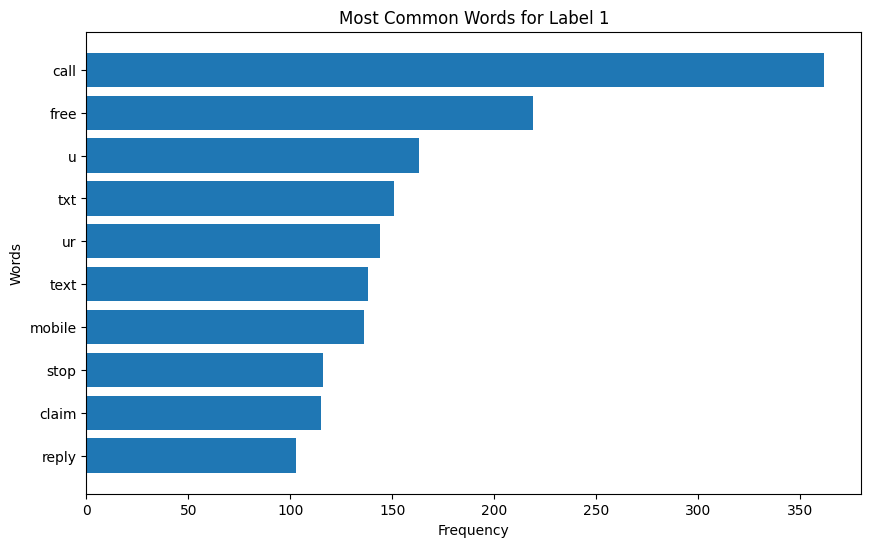

Accuracy: 0.9695
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



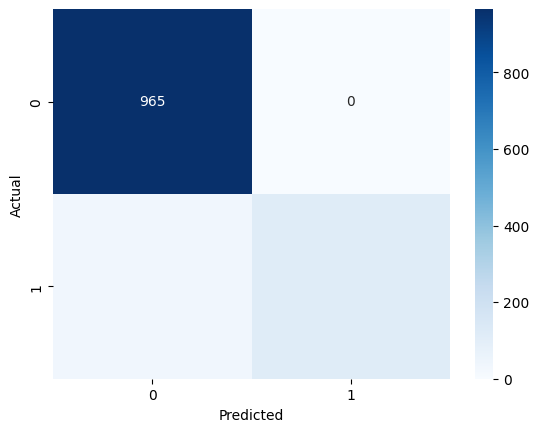

Prediction: 0


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from wordcloud import WordCloud

# Step 1: Import Necessary Libraries
nltk.download('stopwords')
nltk.download('wordnet')

# Step 2: Load the Dataset
data = pd.read_csv("spam.csv", encoding='latin-1')

# Column rename
data.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True) 

# Label encoding
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Drop unnecessary columns
data = data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

# Step 3: Text Data Exploring
df = data

# Display basic information about the dataset
df.info()

# Display summary statistics for the dataset
df.describe(include='all').T

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# Text Length Analysis
# Calculate the length of each text entry
df['text_length'] = df['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Boxplot of text lengths by label
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Lengths by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()

# Step 3: Preprocess the Text Data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Word Frequency Analysis
# Combine all text data into one string
all_words = ' '.join(df['cleaned_text'])

# Tokenize the words
words = all_words.split()

# Calculate word frequencies
word_freq = Counter(words)

# Display the most common words
most_common_words = word_freq.most_common(20)
print(most_common_words)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

# Function to get word frequency for a specific label
def get_word_freq_by_label(label):
    text = ' '.join(df[df['label'] == label]['cleaned_text'])
    words = text.split()
    return Counter(words)

# Get word frequencies for each label
word_freq_label_0 = get_word_freq_by_label(0)
word_freq_label_1 = get_word_freq_by_label(1)

# Display the most common words for each label
print('Most common words for label 0:', word_freq_label_0.most_common(10))
print('Most common words for label 1:', word_freq_label_1.most_common(10))

# Plot the most common words for label 0
common_words_0 = word_freq_label_0.most_common(10)
words_0, counts_0 = zip(*common_words_0)

plt.figure(figsize=(10, 6))
plt.barh(words_0, counts_0)
plt.title('Most Common Words for Label 0')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent words at the top
plt.show()

# Plot the most common words for label 1
common_words_1 = word_freq_label_1.most_common(10)
words_1, counts_1 = zip(*common_words_1)

plt.figure(figsize=(10, 6))
plt.barh(words_1, counts_1)
plt.title('Most Common Words for Label 1')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent words at the top
plt.show()

# Step 4: Split the Dataset
X = df['cleaned_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 6: Train the Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 8: Make Predictions on New Data
new_text = ["This is a sample text to classify"]
new_text_cleaned = [preprocess_text(text) for text in new_text]
new_text_tfidf = tfidf_vectorizer.transform(new_text_cleaned)
prediction = model.predict(new_text_tfidf)
print(f'Prediction: {prediction[0]}')


---

### Key Points:



**Data Loading and Cleaning:** 
    
    The dataset is loaded and cleaned, with unnecessary columns dropped and labels encoded.

**Exploratory Data Analysis (EDA):** 

    Analysis of text lengths and visualizations using histograms and boxplots.

**Text Preprocessing:** 

    Tokenization, lowercasing, removal of stopwords and punctuation, and lemmatization.

**Feature Extraction:** 

    Using TF-IDF vectorizer for converting text to numerical features.

**Model Training:** 
    
    Using Multinomial Naive Bayes classifier to train on the dataset.

**Model Evaluation:** 

    Evaluating model performance using accuracy, classification report, and confusion matrix.

**Prediction on New Data:** 

    Making predictions on new text data using the trained model.